In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

raw = pd.read_csv('./data/assignment2data.csv')

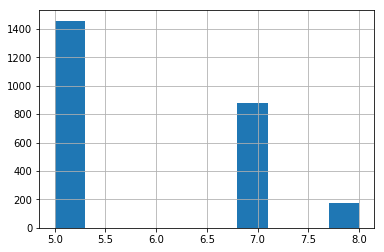

In [2]:
# Plot output values. Since the output qualities
# are either 5, 7 or 8, consider this a three class binary classification problem
raw['quality'].hist(bins=10)

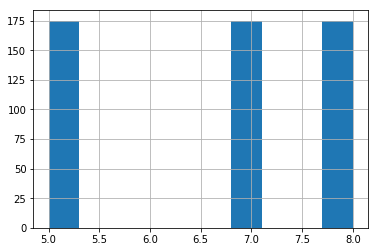

In [3]:
high = raw[raw.quality == 8]
med = raw[raw.quality == 7]
low = raw[raw.quality == 5]

# Get the lowest n per category
nPerCategory = min(len(high), len(med), len(low))

df = pd.concat([
    high.sample(n=nPerCategory),
    med.sample(n=nPerCategory),
    low.sample(n=nPerCategory)
])

df.quality.hist(bins=10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.056404,0.248273,0.196100,0.159556,0.009728,0.204155,0.389063,-0.502347,-0.064036,-0.276573,-0.135881
volatile acidity,-0.056404,1.000000,-0.211383,-0.016827,-0.015842,-0.131603,-0.016109,-0.159582,0.037578,-0.061549,0.273260,-0.075321
citric acid,0.248273,-0.211383,1.000000,0.038441,0.150352,0.137947,0.077819,0.086741,-0.118363,-0.040496,-0.048547,0.019290
residual sugar,0.196100,-0.016827,0.038441,1.000000,0.151684,0.236111,0.472554,0.812739,-0.297101,-0.115358,-0.465315,-0.135247
chlorides,0.159556,-0.015842,0.150352,0.151684,1.000000,0.111979,0.298503,0.372611,-0.177928,-0.017393,-0.442059,-0.311576
free sulfur dioxide,0.009728,-0.131603,0.137947,0.236111,0.111979,1.000000,0.584447,0.243139,0.010413,0.123234,-0.190755,0.035048
total sulfur dioxide,0.204155,-0.016109,0.077819,0.472554,0.298503,0.584447,1.000000,0.604389,-0.080217,0.083209,-0.490984,-0.249872
density,0.389063,-0.159582,0.086741,0.812739,0.372611,0.243139,0.604389,1.000000,-0.231789,0.014869,-0.848040,-0.422791
pH,-0.502347,0.037578,-0.118363,-0.297101,-0.177928,0.010413,-0.080217,-0.231789,1.000000,0.209899,0.217909,0.134548
sulphates,-0.064036,-0.061549,-0.040496,-0.115358,-0.017393,0.123234,0.083209,0.014869,0.209899,1.000000,-0.017684,-0.010038


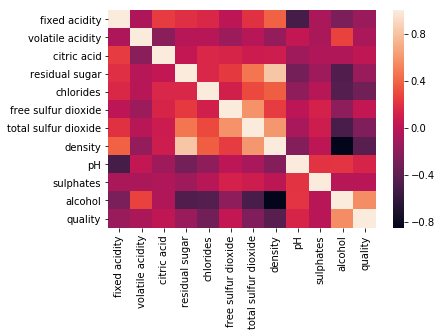

In [4]:

import seaborn as sns

sns.heatmap(df.corr())
df.corr()

,chlorides,total sulfur dioxide,density,pH,alcohol,quality
chlorides,1.000000,0.298503,0.372611,-0.177928,-0.442059,-0.311576
total sulfur dioxide,0.298503,1.000000,0.604389,-0.080217,-0.490984,-0.249872
density,0.372611,0.604389,1.000000,-0.231789,-0.848040,-0.422791
pH,-0.177928,-0.080217,-0.231789,1.000000,0.217909,0.134548
alcohol,-0.442059,-0.490984,-0.848040,0.217909,1.000000,0.561371
quality,-0.311576,-0.249872,-0.422791,0.134548,0.561371,1.000000


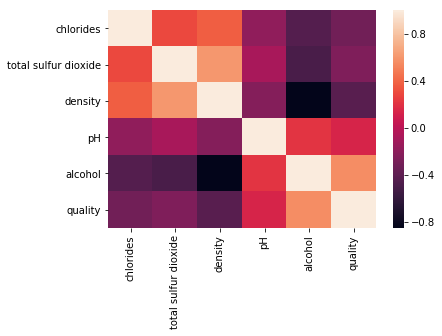

In [5]:
processed = df.drop(
    [
        #'density',
        'citric acid',
        'fixed acidity',
        'volatile acidity',
        'sulphates',
        'residual sugar',
        'free sulfur dioxide',
        #'alcohol'
        #'density',
        #'chlorides',
        #'total sulfur dioxide'
    ], 1)

processed = processed.sample(frac=1)

sns.heatmap(processed.corr())
processed.corr()

In [12]:
normed = (processed - processed.min())/(processed.max() - processed.min())
normed.quality = normed.quality * 3 + 5
training = normed[:420]
testing = normed[420:]

In [13]:
training.to_csv("./data/training.csv", index=False)
testing.to_csv("./data/testing.csv", index=False)

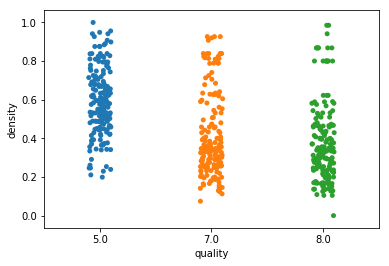

In [14]:
sns.stripplot(x='quality', y='density', data=normed, jitter=True)


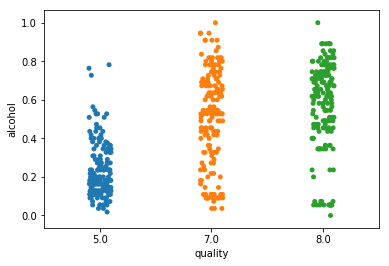

In [15]:
sns.stripplot(x='quality', y='alcohol', data=normed, jitter=True)

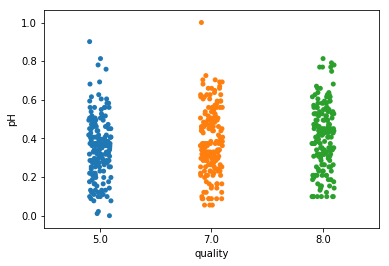

In [16]:
sns.stripplot(x='quality', y='pH', data=normed, jitter=True)

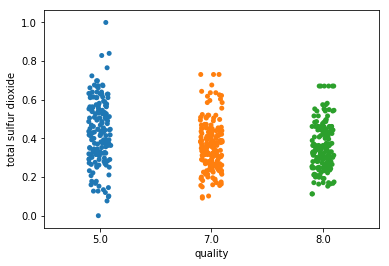

In [17]:
sns.stripplot(x='quality', y='total sulfur dioxide', data=normed, jitter=True)